# Modeling 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
data = pd.read_csv('clean_data.csv')

## 1. Data Inspection: 

In [16]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,sqft_extra,log_sqft_living,log_sqft_lot,log_sqft_living15,log_sqft_lot15,log_sqft_extra,log_price,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1340,5650,1180,7.073270,8.639411,7.200425,8.639411,7.073270,12.309982,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1690,7639,2570,7.851661,8.887653,7.432484,8.941022,7.851661,13.195614,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,2720,8062,770,6.646391,9.210340,7.908387,8.994917,6.646391,12.100712,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1360,5000,1960,7.580700,8.517193,7.215240,8.517193,7.580700,13.311329,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1800,7503,1680,7.426549,8.997147,7.495542,8.923058,7.426549,13.142166,28


In [17]:
# missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21613 non-null  int64  
 1   date               21613 non-null  object 
 2   price              21613 non-null  float64
 3   bedrooms           21613 non-null  int64  
 4   bathrooms          21613 non-null  float64
 5   sqft_living        21613 non-null  int64  
 6   sqft_lot           21613 non-null  int64  
 7   floors             21613 non-null  float64
 8   waterfront         21613 non-null  int64  
 9   view               21613 non-null  int64  
 10  condition          21613 non-null  int64  
 11  grade              21613 non-null  int64  
 12  yr_built           21613 non-null  int64  
 13  yr_renovated       21613 non-null  int64  
 14  zipcode            21613 non-null  int64  
 15  lat                21613 non-null  float64
 16  long               216

## 2. Features (the non-logarithmic and logarithmic features sets)

In [18]:
# non-logged feature set
features = data[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 
                       'waterfront', 'view', 'condition', 'grade', 'sqft_extra', 
                    'yr_built', 'yr_renovated', 'zipcode', 
                       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age']]

# logged feature set
features_log = data[['log_sqft_living', 'log_sqft_lot', 'bedrooms', 'bathrooms', 'floors', 
                   'waterfront', 'view', 'condition', 'grade', 'log_sqft_extra',  
                  'yr_built', 'yr_renovated', 'zipcode', 
                   'lat', 'long', 'log_sqft_living15', 'log_sqft_lot15', 'house_age']]
# target_logged 
target = data['log_price']

# target variable (non-logged)
target_non_log = data['price']

## Data Splitting (the non-logarithmic and logarithmic features sets)

In [19]:
# non-logged feature set
X_train, X_test, y_train, y_test = train_test_split(features, target_non_log, test_size=0.2, random_state=42)

# logged feature set
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features_log, target, test_size=0.2,random_state=42)

# 3. Feature Selection Using Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Build and train the Random Forest model using logged features.
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train_log, y_train_log)  

# Extracting feature importance
feature_importance_logged = pd.DataFrame({
    'Feature': X_train_log.columns,
    'Importance': rf_log.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Feature Importance:")
print(feature_importance_logged)

Top 10 Feature Importance:
              Feature  Importance
8               grade    0.344387
13                lat    0.294766
0     log_sqft_living    0.099612
9      log_sqft_extra    0.084724
14               long    0.046305
15  log_sqft_living15    0.027448
1        log_sqft_lot    0.017075
17          house_age    0.016457
16     log_sqft_lot15    0.015295
12            zipcode    0.011147


In [21]:
len(feature_importance_logged)

10

### Feature Importance Visualization

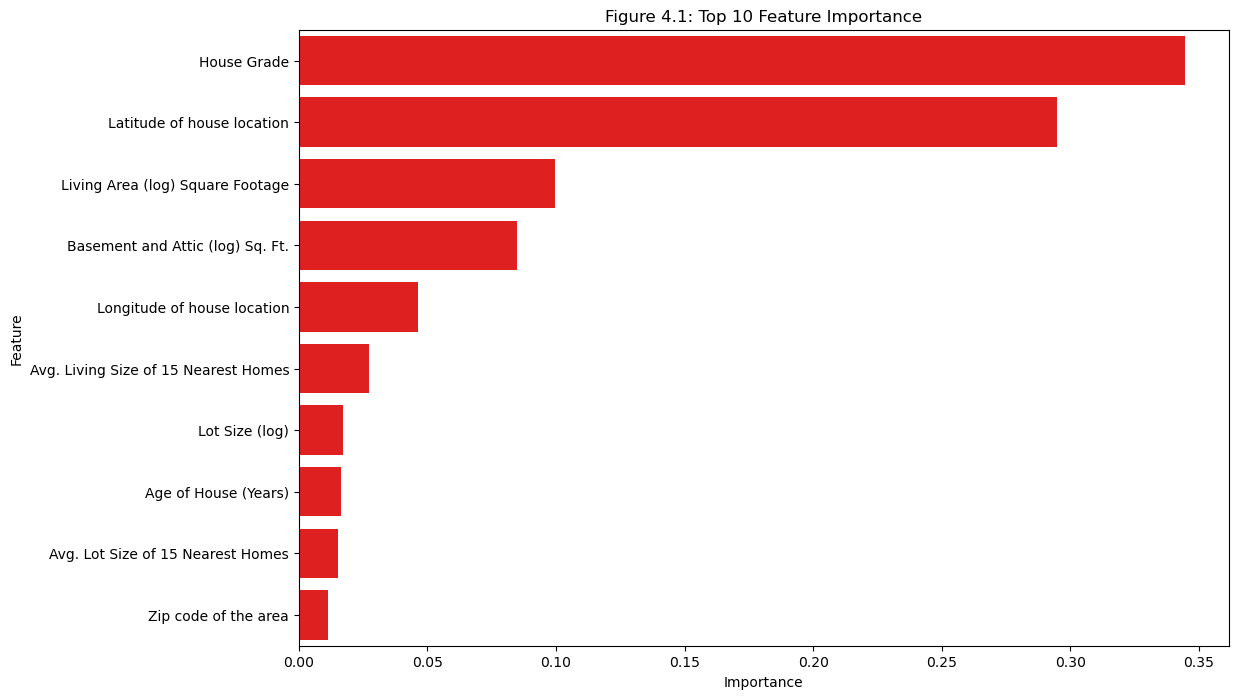

In [22]:
# feature importance 
feature_importance_logged = pd.DataFrame({
    'Feature': X_train_log.columns,
    'Importance': rf_log.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# display names
intuitive_feature_names = {
    'grade': 'House Grade',
    'lat': 'Latitude of house location',
    'log_sqft_living': 'Living Area (log) Square Footage',
    'log_sqft_extra': 'Basement and Attic (log) Sq. Ft.',
    'long': 'Longitude of house location',
    'log_sqft_living15': 'Avg. Living Size of 15 Nearest Homes',
    'log_sqft_lot': 'Lot Size (log)',
    'house_age': 'Age of House (Years)',
    'log_sqft_lot15': 'Avg. Lot Size of 15 Nearest Homes',
    'zipcode': 'Zip code of the area'
}

feature_importance_logged['Feature'] = feature_importance_logged['Feature'].map(intuitive_feature_names)

# plot
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_logged, x='Importance', y='Feature', color="r")
plt.title('Figure 4.1: Top 10 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# save
plt.savefig("top_10_feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

## 4. Training and Evaluating Various Models

### 4.1: Linear Regression models:
### Linear Regression with Non-Logged Features

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model for non-logged features
lr_non_log = LinearRegression()

# Training the model on non-logged features
lr_non_log.fit(X_train, y_train)

# Predicting and evaluating on non-logged features
y_pred_non_log = lr_non_log.predict(X_test)
rmse_non_log = mean_squared_error(y_test, y_pred_non_log, squared=False)

# Printing RMSE for non-logged model
print(f"Linear Regression RMSE with non-logged features: {rmse_non_log.round(4)}")

Linear Regression RMSE with non-logged features: 212242.3529


### Linear Regression with Logged Features

In [24]:
import numpy as np

# Linear Regression model for logged features
lr_log = LinearRegression()

# Training the model on logged features
lr_log.fit(X_train_log, y_train_log)

# Predicting on logged features and transforming predictions back
y_pred_log_transformed = np.exp(lr_log.predict(X_test_log))

# Evaluating on transformed predictions
rmse_log = mean_squared_error(y_test, y_pred_log_transformed, squared=False)

# Printing RMSE for logged model
print(f"Linear Regression RMSE with logged features: {rmse_log.round(4)}")

Linear Regression RMSE with logged features: 198835.5051


### 5.2: Tree-Based Ensemble Methods:

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Random Forest Regressor for non-logged features
rf_non_log = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on non-logged features
rf_non_log.fit(X_train, y_train)

# Predicting and evaluating on non-logged features
y_pred_non_log = rf_non_log.predict(X_test)
rmse_non_log = mean_squared_error(y_test, y_pred_non_log, squared=False)

# Printing RMSE for non-logged model
print(f"Random Forest RMSE with non-logged features: {rmse_non_log.round(4)}")

Random Forest RMSE with non-logged features: 147732.8206


In [26]:
# Random Forest Regressor for logged features
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on logged features
rf_log.fit(X_train_log, y_train_log)

# Predicting on logged features and transforming predictions back
y_pred_log_transformed = np.exp(rf_log.predict(X_test_log))

# Evaluating on transformed predictions
rmse_log = mean_squared_error(y_test, y_pred_log_transformed, squared=False)

# Printing RMSE for logged model
print(f"Random Forest RMSE  with logged features: {rmse_log.round(4)}")

Random Forest RMSE  with logged features: 139035.9512


In [27]:
# Decision Tree Regressor for non-logged features
dt_non_log = DecisionTreeRegressor(random_state=42)

# Training the model on non-logged features
dt_non_log.fit(X_train, y_train)

# Predicting and evaluating on non-logged features
y_pred_non_log = dt_non_log.predict(X_test)
rmse_non_log = mean_squared_error(y_test, y_pred_non_log, squared=False)

# Printing RMSE for non-logged model
print(f"Decision Tree RMSE with non-logged features: {rmse_non_log.round(4)}")

Decision Tree RMSE with non-logged features: 206839.7331


In [28]:
# Decision Tree Regressor for logged features
dt_log = DecisionTreeRegressor(random_state=42)

# Training the model on logged features
dt_log.fit(X_train_log, y_train_log)

# Predicting on logged features and transforming predictions back
y_pred_log_transformed = np.exp(dt_log.predict(X_test_log))

# Evaluating on transformed predictions
rmse_log = mean_squared_error(y_test, y_pred_log_transformed, squared=False)

# Printing RMSE for logged model
print(f"Decision Tree RMSE  with logged features: {rmse_log.round(4)}")

Decision Tree RMSE  with logged features: 183689.1433


In [29]:
# Gradient Boosting Regressor for non-logged features
gb_non_log = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model on non-logged features
gb_non_log.fit(X_train, y_train)

# Predicting and evaluating on non-logged features
y_pred_non_log = gb_non_log.predict(X_test)
rmse_non_log = mean_squared_error(y_test, y_pred_non_log, squared=False)

# Printing RMSE for non-logged model
print(f"Gradient Boosting RMSE with non-logged features: {rmse_non_log.round(4)}")

Gradient Boosting RMSE with non-logged features: 149466.7793


In [30]:
# Gradient Boosting Regressor for logged features
gb_log = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model on logged features
gb_log.fit(X_train_log, y_train_log)

# Predicting on logged features and transforming predictions back
y_pred_log_transformed = np.exp(gb_log.predict(X_test_log))

# Evaluating on transformed predictions
rmse_log = mean_squared_error(y_test, y_pred_log_transformed, squared=False)

# Printing RMSE for logged model
print(f"Gradient Boosting RMSE  with logged features: {rmse_log.round(4)}")

Gradient Boosting RMSE  with logged features: 145788.7191


## 5. Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the Random Forest model
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation using the logged feature set
cv_scores_logged = cross_val_score(rf_log, features_log, target_non_log, 
                                   cv=5, scoring='neg_mean_squared_error')

# Calculating RMSE for each fold 
cv_rmse_scores_logged = (-cv_scores_logged)**0.5
cv_rmse_scores_logged = np.round(cv_rmse_scores_logged, 4)

# Average and standard deviation of the RMSE scores
average_rmse_cv_logged = np.round(cv_rmse_scores_logged.mean(), 4)
std_rmse_cv_logged = np.round(cv_rmse_scores_logged.std(), 4)

# Print 
print("Cross-Validated RMSE Scores with Logged Features:", cv_rmse_scores_logged)
print("Mean RMSE with Logged Features:", average_rmse_cv_logged)
print("Standard Deviation of RMSE with Logged Features:", std_rmse_cv_logged)

Cross-Validated RMSE Scores with Logged Features: [137847.476  127117.2315 118312.9399 127756.5731 129509.7377]
Mean RMSE with Logged Features: 128108.7916
Standard Deviation of RMSE with Logged Features: 6226.8866


## Hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_log, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# fitting the grid search to the data
grid_search.fit(features_log, target_non_log) # do i use non-logged "target" here?

# Best parameters
best_params = grid_search.best_params_
best_score = (-grid_search.best_score_)**0.5  # positive RMSE

best_params, best_score

({'max_depth': 20,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 130423.63923298958)

## Retrain the Model: 

In [33]:
optimized_rf = RandomForestRegressor(max_depth=20, max_features='auto', 
                                     min_samples_leaf=1, min_samples_split=2, 
                                     n_estimators=300, random_state=42)
optimized_rf.fit(X_train_log, y_train_log)

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

## Evaluate the Optimized Model: 

In [34]:
y_pred_optimized_log = (optimized_rf.predict(X_test_log))
y_pred_optimized = np.exp(optimized_rf.predict(X_test_log))
rmse_optimized = mean_squared_error(y_test_log, y_pred_optimized, squared=False)
r2_optimized = r2_score(y_test_log, y_pred_optimized_log)

In [35]:
# results
print("Optimized Random Forest Model")
print("RMSE:", rmse_optimized)
print("R²:", r2_optimized)

Optimized Random Forest Model
RMSE: 634569.4992143009
R²: 0.8910350212282329


## Residual Analysis

In [36]:
columns_for_prediction = [col for col in X_test_log.columns if col in optimized_rf.feature_names_in_]
X_test_numeric = X_test_log[columns_for_prediction]

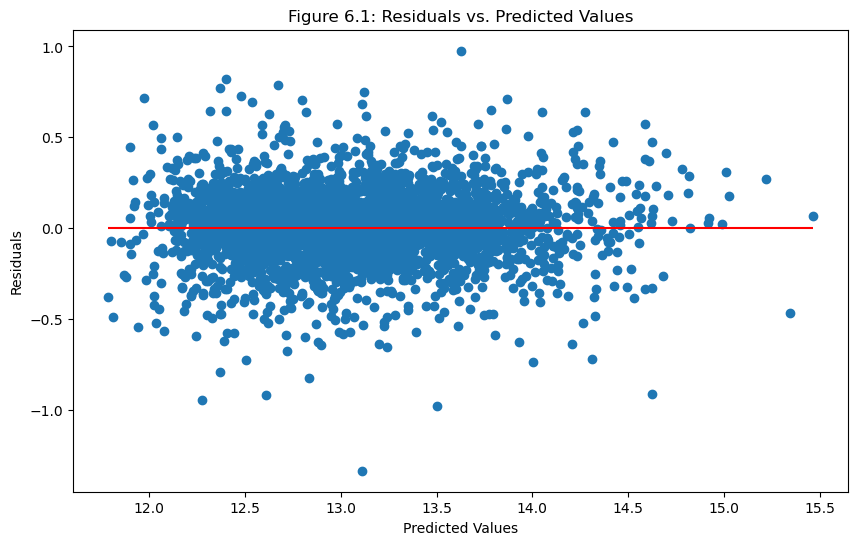

In [37]:
# predict on the test set using only these features
y_pred_all = optimized_rf.predict(X_test_numeric)

# calculate residuals
residuals_all = y_test_log - y_pred_all

# plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_all, residuals_all)
plt.hlines(y=0, xmin=min(y_pred_all), xmax=max(y_pred_all), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Figure 6.1: Residuals vs. Predicted Values')

plt.savefig('residuals_predicted_values.png', bbox_inches='tight',dpi=300)
plt.show()

## Geospatial Validation

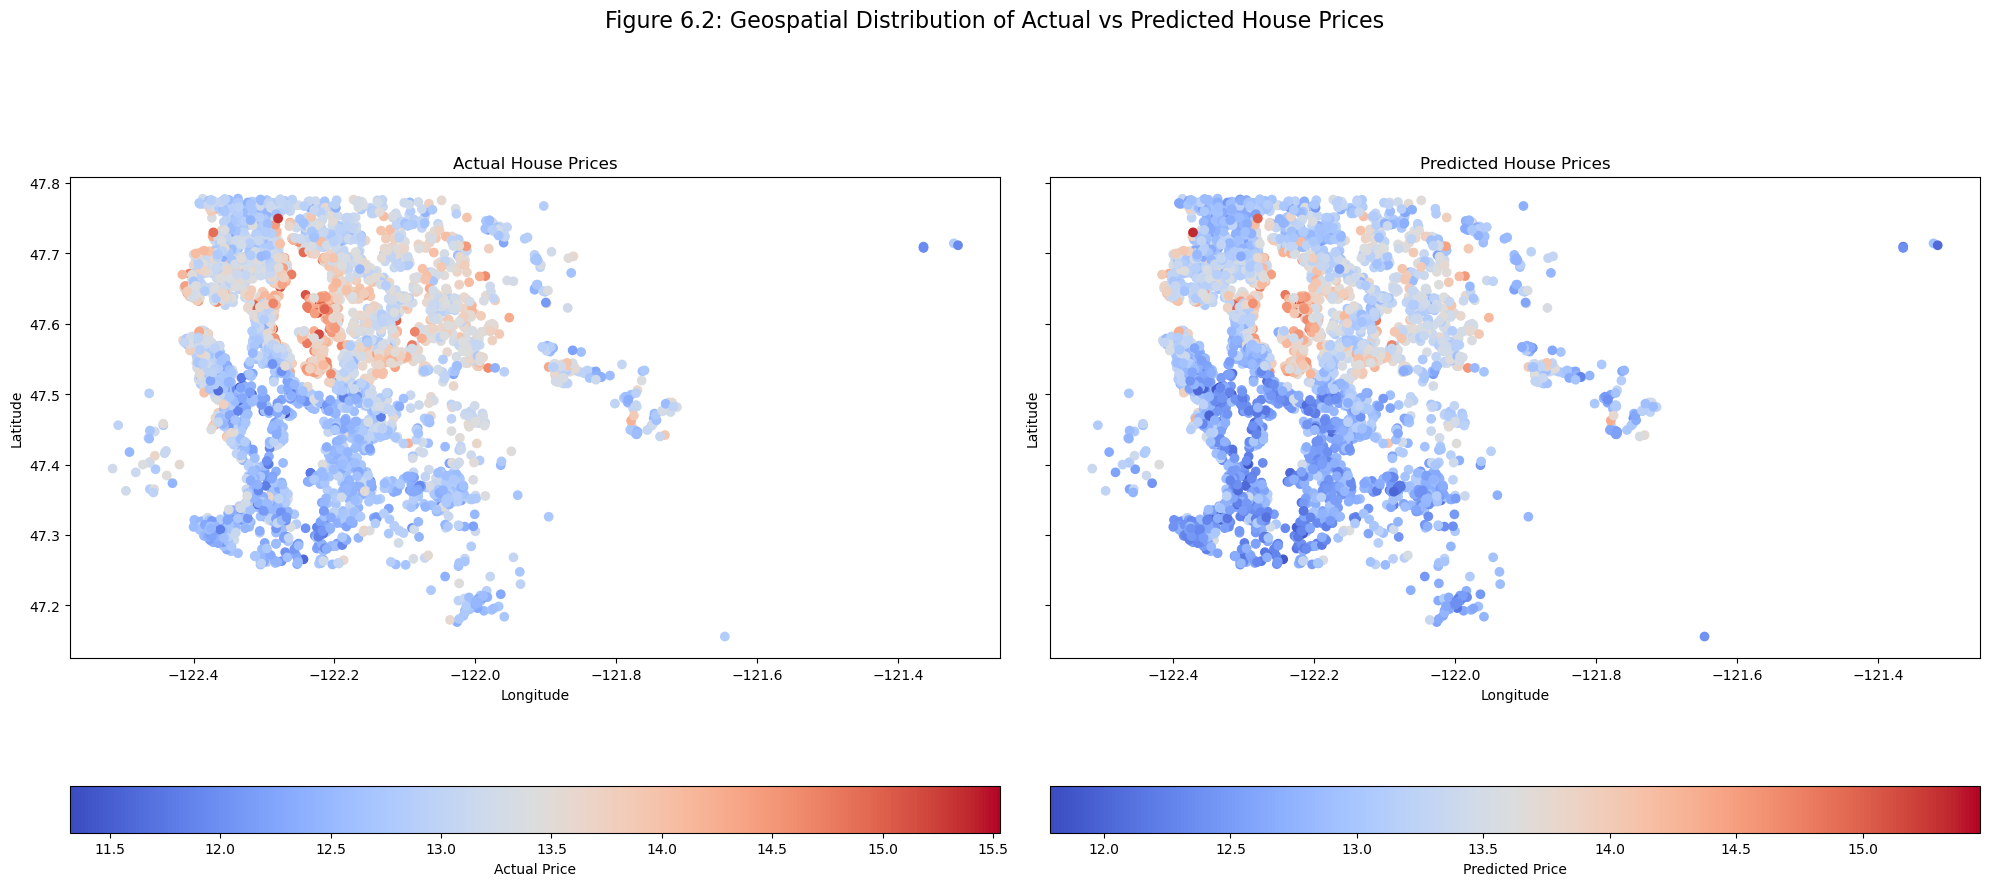

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# predicted on the test set using only the selected features
predicted_prices = optimized_rf.predict(X_test_log)

# GeoDataFrame for test set with actual and predicted prices
gdf_test = gpd.GeoDataFrame(X_test_log, geometry=gpd.points_from_xy(X_test_log.long, X_test_log.lat))
gdf_test['actual_price'] = y_test_log
gdf_test['predicted_price'] = predicted_prices

# side by side for actual vs predicted prices
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Figure 6.2: Geospatial Distribution of Actual vs Predicted House Prices', fontsize=16, y=0.95)

# plot actual prices
gdf_test.plot(ax=axes[0], column='actual_price', cmap='coolwarm', legend=True,
              legend_kwds={'label': 'Actual Price', 'orientation': "horizontal"})
axes[0].set_title('Actual House Prices')

# plot predicted prices
gdf_test.plot(ax=axes[1], column='predicted_price', cmap='coolwarm', legend=True,
              legend_kwds={'label': 'Predicted Price', 'orientation': "horizontal"})
axes[1].set_title('Predicted House Prices')

# labels for both subplots
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('geospatial_validation.png', bbox_inches='tight',dpi=300)
plt.show()